In [2]:
import mglearn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
import scipy as scipy
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Exercise

# Getting the data

In [3]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)

The keys of the object are:

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Let's get a bit acquainted with the data

In [5]:
print(data['DESCR'][:1300])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In this exercise we will stick to the original target variable. Thus, the first task is to divide the data into a training set and a test set. Remember, the latter represents our future unseen examples

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], random_state=0)
print("Number of data points in training set and test set, respectively: {} and {}".format(X_train.shape[0], 
                                                                                          X_test.shape[0]))

Number of data points in training set and test set, respectively: 15480 and 5160


# A first k-NN attempt at a model

In [7]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

Learn the model, which is this case simply means storing the training data

In [8]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [10]:
print("Model score on test set: {}".format(knn.score(X_test, y_test)))
print("Model score on test set: {}".format(knn.score(X_train, y_train)))

Model score on test set: 0.14547754686032732
Model score on test set: 0.44253742581725575


In [20]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)
print("Model accuracy on the test data: {}".format(knn.score(X_test,y_test)))
print("Model accuracy on the train data: {}".format(knn.score(X_train,y_train)))

Model accuracy on the test data: 0.13696486243559625
Model accuracy on the train data: 0.4947490872948288


*Note again:* Accruracy is measured by the R^2 coefficient defined as (1 - u/v), where 
 * u is the residual sum of squares ((y_true - y_pred)^2).sum() 
 * v is the total sum of squares ((y_true - y_true.mean())^2).sum().
 
 The values are between 0 and 1, where higher is better.

### *Exercise:* 
* Calculate the performance of the model on the training data
* Try adusting the number of neighbors and see what impact is has on the two scores

# A second k-NN attempt at a model

Let's first take a slightly closer look at our data.

In [21]:
data_df = pd.DataFrame(X_train, columns=data['feature_names'])
data_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,3.874641,28.629264,5.432519,1.095766,1426.281137,3.037852,35.627119,-119.566138
std,1.894656,12.599829,2.533705,0.493023,1144.524906,6.649475,2.138223,2.006152
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000
25%,2.569850,18.000000,4.454109,1.005735,785.000000,2.428571,33.930000,-121.800000
50%,3.549850,29.000000,5.234243,1.048611,1167.000000,2.818463,34.250000,-118.490000
75%,4.750000,37.000000,6.055028,1.100000,1724.000000,3.282564,37.710000,-118.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,599.714286,41.950000,-114.310000


A box plot can also provide a quick overview:

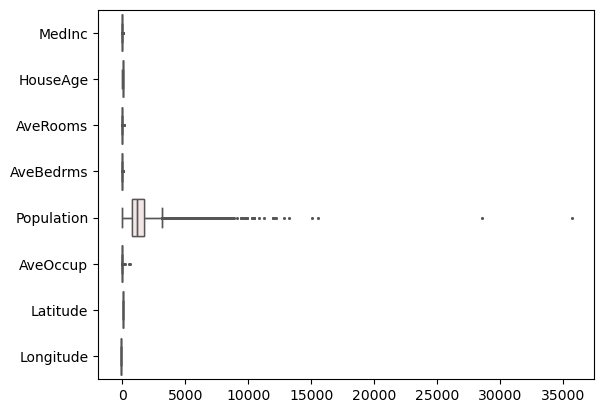

In [23]:
sns.boxplot(data=data_df, palette="vlag", orient='h',fliersize=1)
plt.show()

From the table and the plot we can see some potential issues with the data. Specifically, the scales of some of the features vary quite a lot. For example, the mean of 'Population' is 1426.28 but for 'AveBedrms' it is 1.096. As we saw on the slides, standard distance measures can have a hard time dealing with this. Thus, we resort to normalization (in this case Z-score): 

$$ \mathit{normalized(F)} = \frac{F-\mathit{mean}(F)}{\mathit{std}(F)}$$

Note that below:
* we only use data from the training set when performing the normalization
* the suffix '_n' added to the variables indicates that the features have been normalized.

In [24]:
X_train_n = (X_train-X_train.mean(axis=0))/X_train.std(axis=0)
X_test_n = (X_test-X_train.mean(axis=0))/X_train.std(axis=0)

The result of the normalization

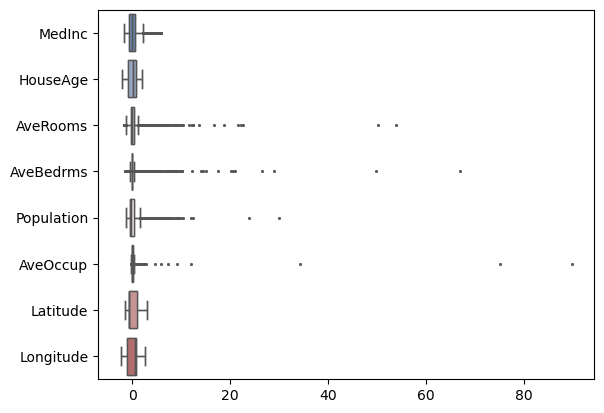

In [26]:
sns.boxplot(data=pd.DataFrame(X_train_n, columns=data['feature_names']), palette="vlag", orient='h',fliersize=1)
plt.show()

Now fit the model to the transformed dataset and score the test set

In [27]:
knn.fit(X_train_n, y_train)
print("Model score on Z-score normalized test set: {}".format(knn.score(X_test_n, y_test)))

Model score on Z-score normalized test set: 0.6805672492312864


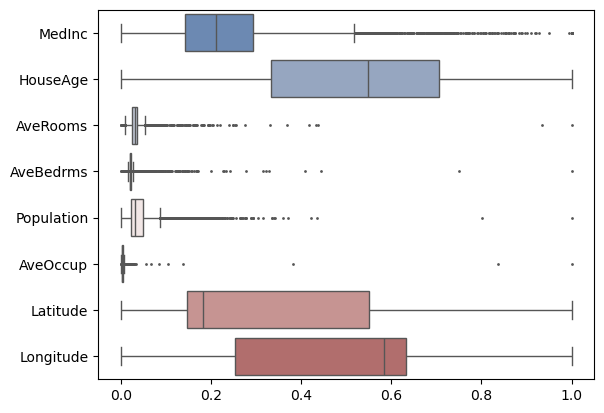

Model score on Z-score normalized test set: 0.6872258649686641


In [29]:
# min-max normilization
X_train_mmn = (X_train-X_train.min(axis=0))/(X_train.max(axis=0)-X_train.min(axis=0))
X_test_mmn = (X_test-X_train.min(axis=0))/(X_train.max(axis=0)-X_train.min(axis=0))

sns.boxplot(data=pd.DataFrame(X_train_mmn, columns=data['feature_names']), palette="vlag", orient='h',fliersize=1)
plt.show()

knn.fit(X_train_mmn, y_train)
print("Model score on Z-score normalized test set: {}".format(knn.score(X_test_mmn, y_test)))

### *Exercise*: 
* Try making a min-max normalization of the data:
$$ \mathit{normalized(F)} = \frac{F-\mathit{min}(F)}{\mathit{max}(F)-\mathit{min}(F)}$$
* Make a boxplot of the normalized data and compare with the plot obtained from Z-score normalization
* Learn a kNN model and fit it to the new data. Is there a difference in score compared to what was achived using Z-score normalization? Why could that be the case?

# A third kNN model

The data analysis so far has only focused on the individual variables. Let's now look at the interaction between the variables.

In [ ]:
sns.pairplot(data_df)

The covariance matrix captures some of the variability in the data. We can see this by plotting it as a heatmap

In [ ]:
train_cov = np.cov(X_train_n, rowvar=False)
sns.heatmap(train_cov, 
        xticklabels=data['feature_names'],
        yticklabels=data['feature_names'])


The joint variability of the variables is not reflected in the Euclidean distance measure used so far (c.f. Slide 7). We may try to account for this variability using the Mahalanobis distance measure.

In [ ]:
# We need to supply the Mahalanobis distance with the data covariance matrix  
knn = KNeighborsRegressor(n_neighbors=5, metric="mahalanobis", metric_params={'V': train_cov})

### *Exercise:*
* Fit the newly specified model (that relies on the Mahalanobis distance) using both the original data and the normalized data
* Evaluate the models with different number of neighbors and compare to the results previously obtained